In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Library used for working with arrays. It also has functions for working in domain of linear algebra.
import numpy as np 
# Library used for data structures and data analysis tools
import pandas as pd 
#Comprehensive library for creating static, animated, and interactive visualizations 
import matplotlib.pyplot as plt 
import plotly as py
import plotly.express as px

%matplotlib inline
  


In [ ]:
import zipfile
!unzip /tmp/PM.zip
!unzip /tmp/h1n1.zip

Archive:  /tmp/PM.zip
replace PM2.5 Global Air Pollution 2010-2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /tmp/h1n1.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace summary_africa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace summary_asia.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace summary_europe.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace summary_germany.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace summary_india.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace summary_south_america.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace summary_usa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /tmp/death.zip
  inflating: death-rates-from-air-pollution.csv  


In [ ]:
swine = pd.read_csv("/content/data.csv")
pm=pd.read_csv("/content/PM2.5 Global Air Pollution 2010-2017.csv")

In [ ]:
swine.drop(['Link'], axis=1, inplace=True)
swine.head(10)

Date  ... Cumulative no. of deaths
0  2009-04-24  ...                        0
1  2009-04-24  ...                        0
2  2009-04-26  ...                        0
3  2009-04-26  ...                        0
4  2009-04-27  ...                        0
5  2009-04-27  ...                        7
6  2009-04-27  ...                        0
7  2009-04-27  ...                        0
8  2009-04-28  ...                        0
9  2009-04-28  ...                        0

[10 rows x 4 columns]

In [ ]:
pm = pm.rename(columns={'Country Name':'Country'})
pm.head()

Country Country Code       2010  ...       2015       2016       2017
0  Afghanistan          AFG  65.245592  ...  61.252656  56.287047  56.910808
1       Angola          AGO  33.787247  ...  32.729873  31.785389  32.388505
2      Albania          ALB  21.277828  ...  19.512540  18.189934  18.200603
3      Andorra          AND  12.807198  ...  11.462178  10.255834  10.307621
4   Arab World          ARB  53.787001  ...  60.406813  58.764905  58.689259

[5 rows x 10 columns]

In [ ]:
# 1. Let's create lot of DataFrame where each one has the information about one specific year
pm_country = pm['Country']
pm_country_2010 = pd.DataFrame({'Country':pm_country, 'Year':2010, 'PM2.5':pm['2010']})
pm_country_2011 = pd.DataFrame({'Country':pm_country, 'Year':2011, 'PM2.5':pm['2011']})
pm_country_2012 = pd.DataFrame({'Country':pm_country, 'Year':2012, 'PM2.5':pm['2012']})
pm_country_2013 = pd.DataFrame({'Country':pm_country, 'Year':2013, 'PM2.5':pm['2013']})
pm_country_2014 = pd.DataFrame({'Country':pm_country, 'Year':2014, 'PM2.5':pm['2014']})
pm_country_2015 = pd.DataFrame({'Country':pm_country, 'Year':2015, 'PM2.5':pm['2015']})
pm_country_2016 = pd.DataFrame({'Country':pm_country, 'Year':2016, 'PM2.5':pm['2016']})
pm_country_2017 = pd.DataFrame({'Country':pm_country, 'Year':2017, 'PM2.5':pm['2017']})

# 2. Let's concat all DataFrames
pm_country = pd.concat([pm_country_2010, pm_country_2011, pm_country_2012, pm_country_2013,
                        pm_country_2014, pm_country_2015, pm_country_2016, pm_country_2017], ignore_index=True)
pm_country

Country  Year      PM2.5
0      Afghanistan  2010  65.245592
1           Angola  2010  33.787247
2          Albania  2010  21.277828
3          Andorra  2010  12.807198
4       Arab World  2010  53.787001
...            ...   ...        ...
1915         Samoa  2017  11.548027
1916   Yemen, Rep.  2017  50.456007
1917  South Africa  2017  25.102205
1918        Zambia  2017  27.438035
1919      Zimbabwe  2017  22.251671

[1920 rows x 3 columns]

In [ ]:
h1n1_countries = swine.groupby(['Country','Date']).sum().reset_index().sort_values('Date', ascending=True)
h1n1_countries = h1n1_countries[h1n1_countries['Cumulative no. of cases']>0]
h1n1_countries.drop(['Date'], axis=1, inplace=True)
h1n1_countries

Country  ...  Cumulative no. of deaths
2362  United States of America  ...                         0
1437                    Mexico  ...                         0
1438                    Mexico  ...                         0
2363  United States of America  ...                         0
321                     Canada  ...                         0
...                        ...  ...                       ...
2359            United Kingdom  ...                         3
1098                     India  ...                         0
245      Bosnia and Hezegovina  ...                         0
2044                  Slovenia  ...                         0
2489                     Yemen  ...                         0

[2490 rows x 3 columns]

In [ ]:
 info = pd.merge(h1n1_countries,pm_country,on='Country')

In [ ]:
info

Country  Cumulative no. of cases  ...  Year      PM2.5
0      Mexico                       18  ...  2010  26.365439
1      Mexico                       18  ...  2011  27.741297
2      Mexico                       18  ...  2012  25.981659
3      Mexico                       18  ...  2013  25.449090
4      Mexico                       18  ...  2014  23.099690
...       ...                      ...  ...   ...        ...
17035  Guyana                        2  ...  2013  24.855503
17036  Guyana                        2  ...  2014  23.648266
17037  Guyana                        2  ...  2015  23.887882
17038  Guyana                        2  ...  2016  22.371499
17039  Guyana                        2  ...  2017  22.375575

[17040 rows x 5 columns]

In [ ]:
info.describe()

Cumulative no. of cases  ...         PM2.5
count             17040.000000  ...  17040.000000
mean                257.830986  ...     21.015892
std                 998.993116  ...     16.490054
min                   1.000000  ...      5.861331
25%                   2.000000  ...     11.618901
50%                  10.000000  ...     16.152840
75%                  67.000000  ...     24.019238
max               10262.000000  ...    100.784428

[8 rows x 4 columns]

In [ ]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17040 entries, 0 to 17039
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   17040 non-null  object 
 1   Cumulative no. of cases   17040 non-null  int64  
 2   Cumulative no. of deaths  17040 non-null  int64  
 3   Year                      17040 non-null  int64  
 4   PM2.5                     17040 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 798.8+ KB


In [ ]:
info.to_csv('info.csv')

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
eda = sweetviz.analyze(info)
eda.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=93f03936be61d265293526d713d86730f73d72e3e49a27c4f1ec571792bd366f
  Stored in directory: /tmp/pip-ephem-wheel-cache-q5bniugc/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
# import o ProfileReport
from pandas_profiling import ProfileReport

profile = ProfileReport(info, title='Analysis of H1N1 x deaths by Air pollutants in 2009', html={'style':{'full_width':True}})

In [ ]:
profile

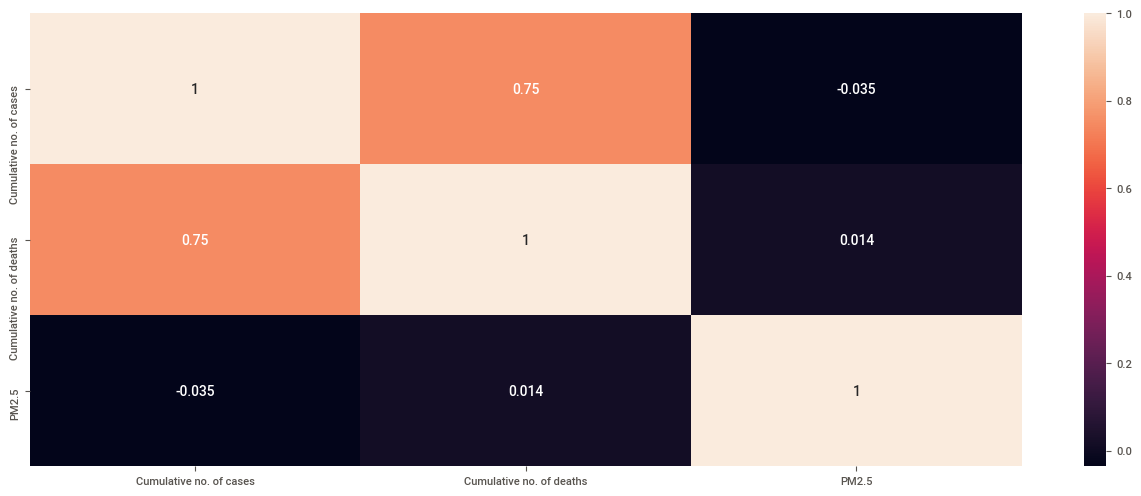

In [ ]:
import seaborn as sns
info.drop(['Year'],axis=1,inplace=True)
corr = info.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(data=corr, annot=True)

**Analysing Sars, H1N1 and MERS**

Using Kaggle and NASA data(Canada)
https://www.kaggle.com/imdevskp/sars-outbreak-2003-complete-dataset

https://www.kaggle.com/imdevskp/mers-outbreak-dataset-20122019



In [ ]:
df_pollution = pd.read_csv("/tmp/df_pollution_convert_coordinates.csv")


In [ ]:
import zipfile
!unzip /tmp/mers.zip
!unzip /tmp/sars-2003.zip

Archive:  /tmp/mers.zip
  inflating: sars_2003_complete_dataset_clean.csv  
  inflating: summary_data_clean.csv  
Archive:  /tmp/sars-2003.zip
  inflating: country_count_latest.csv  
  inflating: demographics.csv        
  inflating: details.csv             
  inflating: saudi_arabia_vs_south_korea_comparison.csv  
  inflating: type_of_contact.csv     
  inflating: weekly_clean.csv        


In [ ]:
mers = pd.read_csv("/content/weekly_clean.csv")
sars= pd.read_csv("/content/summary_data_clean.csv")

In [ ]:
mers = mers.rename(columns={'Region':'Country'})
mers_countries = mers.groupby(['Country','Year']).sum().reset_index().sort_values('Year', ascending=True)
mers_countries = mers_countries[mers_countries['New Cases']>0]
mers_countries


Country  Year  New Cases
0     Other Countries  2012          4
16       Saudi Arabia  2012          5
1     Other Countries  2013         33
17       Saudi Arabia  2013        158
2     Other Countries  2014         89
18       Saudi Arabia  2014        659
19       Saudi Arabia  2015        458
11  Republic of Korea  2015        185
3     Other Countries  2015         39
4     Other Countries  2016         10
20       Saudi Arabia  2016        247
5     Other Countries  2017         14
21       Saudi Arabia  2017        240
22       Saudi Arabia  2018        138
14  Republic of Korea  2018          1
6     Other Countries  2018          3
7     Other Countries  2019         13
23       Saudi Arabia  2019        151

In [ ]:
sars = sars.rename(columns={'Country/Region':'Country'})
sars

Country  ...  Percentage of HCW affected
0              Australia  ...                           0
1                 Canada  ...                          43
2                  China  ...                          19
3   Hong Kong SAR, China  ...                          22
4       Macao SAR, China  ...                           0
5                 Taiwan  ...                          20
6                 France  ...                          29
7                Germany  ...                          11
8                  India  ...                           0
9              Indonesia  ...                           0
10                 Italy  ...                           0
11                Kuwait  ...                           0
12              Malaysia  ...                           0
13              Mongolia  ...                           0
14           New Zealand  ...                           0
15           Philippines  ...                          29
16   Republic of Ireland  ...                           0
17     Republic of Korea  ...                           0
18               Romania  ...                           0
19    Russian Federation  ...                           0
20             Singapore  ...                          41
21          South Africa  ...                           0
22                 Spain  ...                           0
23                Sweden  ...                           0
24           Switzerland  ...                           0
25              Thailand  ...                          11
26        United Kingdom  ...                           0
27         United States  ...                           0
28              Viet Nam  ...                          57

[29 rows x 14 columns]

In [ ]:
df_pollution_sars = df_pollution[df_pollution['date']>='2003-01-01']

# fig = px.scatter_geo(df_pollution_sars,
#                      locations='Country',
#                      locationmode='country names',
#                      color='Alt_Mean_co2',
#                      hover_name='Country',
#                      animation_frame='date',
#                      size='Alt_Mean_co2'
#                  )
# fig.update_layout(title_text='CO2 emission',
#                  title_x=0.5,
#                  geo=dict(
#                 showcoastlines=True,)
#                  )
# fig.show()

In [ ]:
pollution_and_sars = pd.merge(sars, df_pollution_sars, on='Country')
pollution_and_sars

Country  Cumulative male cases  ...  Alt_Mean_ch4   Alt_Mean_o3
0         Australia                      4  ...  2.965189e-06  1.406811e-05
1         Australia                      4  ...  3.038776e-06  1.571116e-05
2         Australia                      4  ...  5.519304e-06  2.863627e-05
3         Australia                      4  ...  6.932223e-06  3.620476e-05
4         Australia                      4  ...  5.931405e-06  3.251041e-05
...             ...                    ...  ...           ...           ...
3845  United States                     13  ...  2.086585e-06  1.041011e-05
3846  United States                     13  ...  3.121077e-06  1.449811e-05
3847  United States                     13  ...  1.232307e-06  5.750226e-06
3848  United States                     13  ...  2.562137e-07  9.374910e-07
3849  United States                     13  ...  2.419990e-07  1.228391e-06

[3850 rows x 21 columns]

In [ ]:
df_pollution_h1n1 = df_pollution[(df_pollution['date']>='2009-01-01') & (df_pollution['date']<'2011-01-01')]

pollution_and_h1n1 = pd.merge(h1n1_countries, df_pollution_h1n1, on='Country')

# Let's create the correlation between the columns
corr_matrix = pollution_and_h1n1.corr() 	
corr_matrix = corr_matrix[['Cumulative no. of cases','Cumulative no. of deaths',
                           'Alt_Mean_co2','Alt_Mean_no2','Alt_Mean_ch4','Alt_Mean_o3']]

corr_matrix.drop(['lat', 'long'], inplace=True)
# This will mask the values mirrored
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

In [ ]:
corr_matrix

Cumulative no. of cases  ...  Alt_Mean_o3
Cumulative no. of cases                  1.000000  ...    -0.269041
Cumulative no. of deaths                 0.881422  ...    -0.237115
Alt_Mean_co2                            -0.265065  ...     0.980225
Alt_Mean_no2                            -0.237894  ...     0.920627
Alt_Mean_ch4                            -0.276971  ...     0.986360
Alt_Mean_o3                             -0.269041  ...     1.000000

[6 rows x 6 columns]

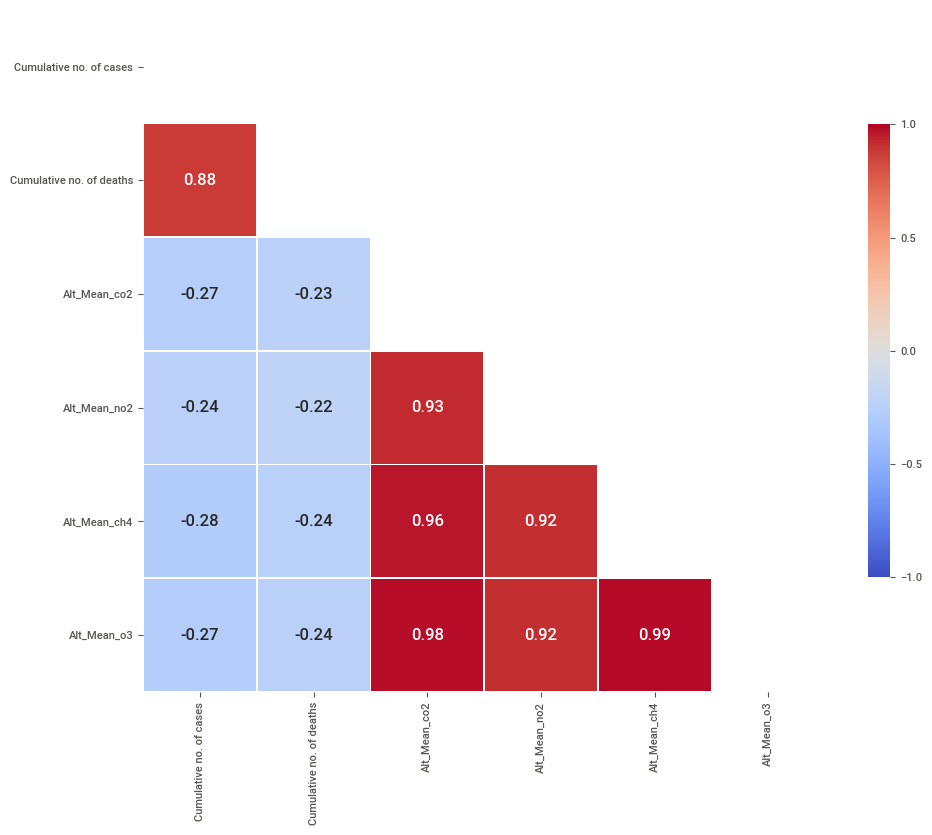

In [ ]:
# Plot the correlation matrix chart
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
fig = px.scatter_geo(df_pollution_h1n1,
                     locations='Country',
                     locationmode='country names',
                     color='Alt_Mean_ch4',
                     hover_name='Country',
                     animation_frame='date',
                     size='Alt_Mean_ch4'
                 )
fig.update_layout(title_text='CH4 emission',
                 title_x=0.5,
                 geo=dict(
                showcoastlines=True,)
                 )
fig.show()

In [ ]:
df_pollution_mers = df_pollution[(df_pollution['date']>='2012-01-01') & (df_pollution['date']<'2019-06-30')]

pollution_and_mers = pd.merge(mers_countries, df_pollution_mers, on='Country')

# Let's create the correlation between the columns
corr_matrix = pollution_and_mers.corr() 	
corr_matrix = corr_matrix[['New Cases','Alt_Mean_co2','Alt_Mean_no2','Alt_Mean_ch4','Alt_Mean_o3']]

corr_matrix.drop(['lat', 'long'], inplace=True)
# This will mask the values mirrored
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

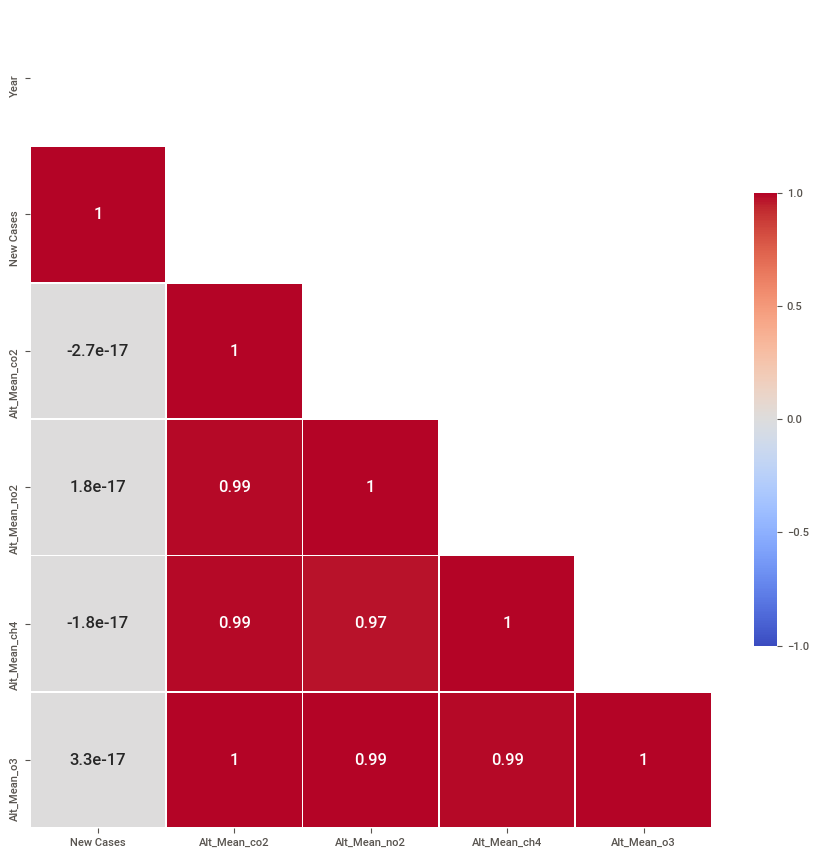

In [ ]:
# Plot the correlation matrix chart
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [91]:
fig = px.scatter_geo(df_pollution_mers,
                     locations='Country',
                     locationmode='country names',
                     color='Alt_Mean_co2',
                     hover_name='Country',
                     animation_frame='date',
                     size='Alt_Mean_co2'
                 )
fig.update_layout(title_text='CH4 emission',
                 title_x=0.5,
                 geo=dict(
                showcoastlines=True,)
                 )
fig.show()